# Car Evaluation

*Supervised Learning*

CS7641 - Machine Learning

Kamolphan Liwprasert (kliwprasert3@gatech.edu)

GTID: 903457032


# Dataset Information
https://archive.ics.uci.edu/ml/datasets/car+evaluation

1. Title: Car Evaluation Database

2. Sources:
   (a) Creator: Marko Bohanec
   (b) Donors: Marko Bohanec   (marko.bohanec@ijs.si)
               Blaz Zupan      (blaz.zupan@ijs.si)
   (c) Date: June, 1997

3. Past Usage:

   The hierarchical decision model, from which this dataset is
   derived, was first presented in 

   M. Bohanec and V. Rajkovic: Knowledge acquisition and explanation for
   multi-attribute decision making. In 8th Intl Workshop on Expert
   Systems and their Applications, Avignon, France. pages 59-78, 1988.

   Within machine-learning, this dataset was used for the evaluation
   of HINT (Hierarchy INduction Tool), which was proved to be able to
   completely reconstruct the original hierarchical model. This,
   together with a comparison with C4.5, is presented in

   B. Zupan, M. Bohanec, I. Bratko, J. Demsar: Machine learning by
   function decomposition. ICML-97, Nashville, TN. 1997 (to appear)

4. Relevant Information Paragraph:

   Car Evaluation Database was derived from a simple hierarchical
   decision model originally developed for the demonstration of DEX
   (M. Bohanec, V. Rajkovic: Expert system for decision
   making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates
   cars according to the following concept structure:
```
   CAR                      car acceptability
   . PRICE                  overall price
   . . buying               buying price
   . . maint                price of the maintenance
   . TECH                   technical characteristics
   . . COMFORT              comfort
   . . . doors              number of doors
   . . . persons            capacity in terms of persons to carry
   . . . lug_boot           the size of luggage boot
   . . safety               estimated safety of the car
```
   Input attributes are printed in lowercase. Besides the target
   concept (CAR), the model includes three intermediate concepts:
   PRICE, TECH, COMFORT. Every concept is in the original model
   related to its lower level descendants by a set of examples (for
   these examples sets see http://www-ai.ijs.si/BlazZupan/car.html).

   The Car Evaluation Database contains examples with the structural
   information removed, i.e., directly relates CAR to the six input
   attributes: buying, maint, doors, persons, lug_boot, safety.

   Because of known underlying concept structure, this database may be
   particularly useful for testing constructive induction and
   structure discovery methods.

5. Number of Instances: 1728
   (instances completely cover the attribute space)

6. Number of Attributes: 6

7. Attribute Values:
```
   buying       v-high, high, med, low
   maint        v-high, high, med, low
   doors        2, 3, 4, 5-more
   persons      2, 4, more
   lug_boot     small, med, big
   safety       low, med, high
```
8. Missing Attribute Values: none

9. Class Distribution (number of instances per class)
```
   class      N          N[%]
   -----------------------------
   unacc     1210     (70.023 %) 
   acc        384     (22.222 %) 
   good        69     ( 3.993 %) 
   v-good      65     ( 3.762 %) 
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')  
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('car.data', header=None)
data.columns = ['buying', 'maint','doors', 'persons','lug_boot', 'safety','class']

print("Dataset Shape: ", data.shape)
data.head()

Dataset Shape:  (1728, 7)


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,2,2,med,med,unacc
freq,432,432,432,576,576,576,1210


In [5]:
data.isnull().any()
# no data to impute 

buying      False
maint       False
doors       False
persons     False
lug_boot    False
safety      False
class       False
dtype: bool

In [6]:
data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

Text(0.5, 1.0, 'Count No. of Instances per Class')

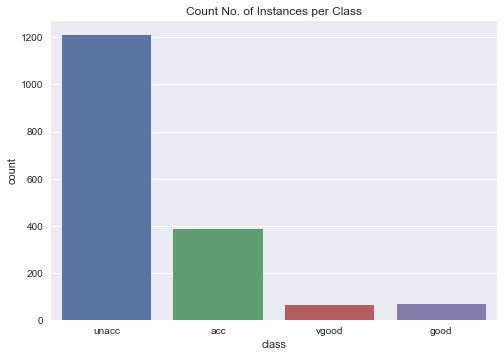

In [7]:
ax = sns.countplot(data['class'])
ax.set_title('Count No. of Instances per Class')

class   acc  good  unacc  vgood
buying                         
high    108     0    324      0
low      89    46    258     39
med     115    23    268     26
vhigh    72     0    360      0


Text(0.5, 1.0, 'Buying Price Crosstab with Classs')

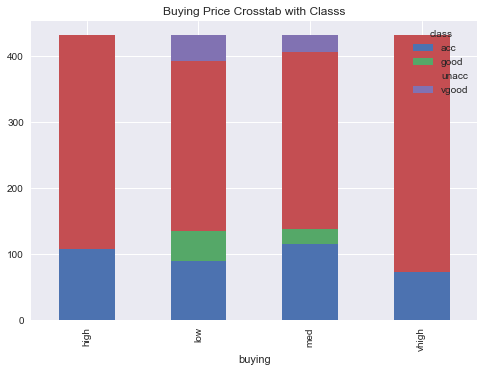

In [8]:
ct = pd.crosstab(data['buying'], data['class'])
print(ct)
ax = ct.plot.bar(stacked=True)
ax.set_title('Buying Price Crosstab with Classs')

class  acc  good  unacc  vgood
maint                         
high   105     0    314     13
low     92    46    268     26
med    115    23    268     26
vhigh   72     0    360      0


Text(0.5, 1.0, 'Maintence Cost Crosstab with Classs')

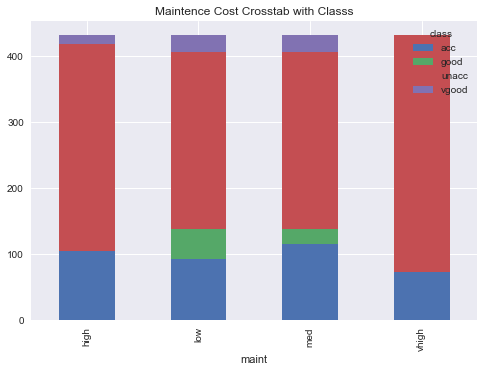

In [9]:
ct = pd.crosstab(data['maint'], data['class'])
print(ct)
ax = ct.plot.bar(stacked=True)
ax.set_title('Maintence Cost Crosstab with Classs')

class  acc  good  unacc  vgood
doors                         
2       81    15    326     10
3       99    18    300     15
4      102    18    292     20
5more  102    18    292     20


Text(0.5, 1.0, 'No. of Doors Crosstab with Classs')

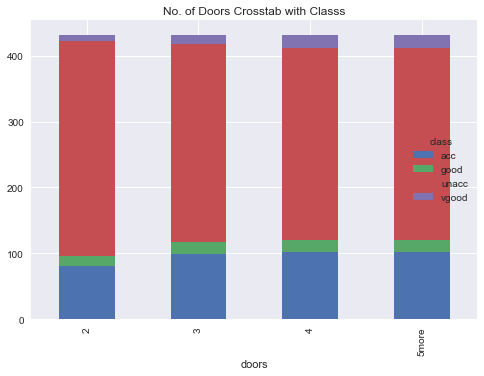

In [10]:
ct = pd.crosstab(data['doors'], data['class'])
print(ct)
ax = ct.plot.bar(stacked=True)
ax.set_title('No. of Doors Crosstab with Classs')

class    acc  good  unacc  vgood
persons                         
2          0     0    576      0
4        198    36    312     30
more     186    33    322     35


Text(0.5, 1.0, 'No. of seats (persons) Crosstab with Classs')

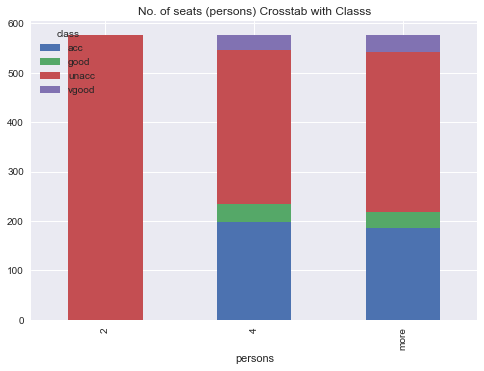

In [11]:
ct = pd.crosstab(data['persons'], data['class'])
print(ct)
ax = ct.plot.bar(stacked=True)
ax.set_title('No. of seats (persons) Crosstab with Classs')

class     acc  good  unacc  vgood
lug_boot                         
big       144    24    368     40
med       135    24    392     25
small     105    21    450      0


Text(0.5, 1.0, 'Luggage Boot Crosstab with Classs')

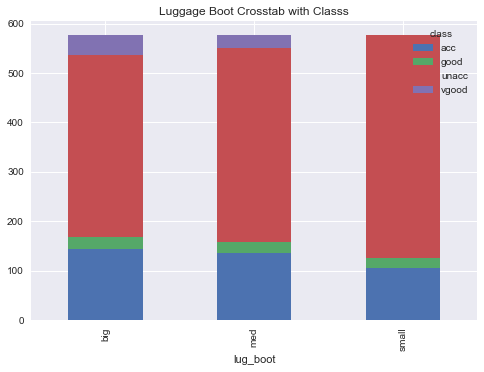

In [12]:
ct = pd.crosstab(data['lug_boot'], data['class'])
print(ct)
ax = ct.plot.bar(stacked=True)
ax.set_title('Luggage Boot Crosstab with Classs')

class   acc  good  unacc  vgood
safety                         
high    204    30    277     65
low       0     0    576      0
med     180    39    357      0


Text(0.5, 1.0, 'Safety Crosstab with Classs')

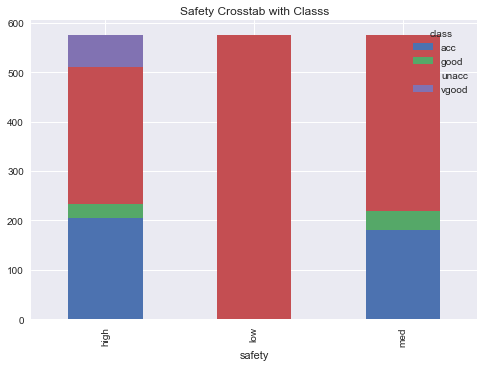

In [13]:
ct = pd.crosstab(data['safety'], data['class'])
print(ct)
ax = ct.plot.bar(stacked=True)
ax.set_title('Safety Crosstab with Classs')

# Label Encoding
Original Dataset
```
   buying       vhigh, high, med, low
   maint        vhigh, high, med, low
   doors        2, 3, 4, 5more
   persons      2, 4, more
   lug_boot     small, med, big
   safety       low, med, high
   
   class        unacc, acc, good, vgood
```

Encoded Dataset
```
   buying       4, 3, 2, 1
   maint        4, 3, 2, 1
   doors        2, 3, 4, 5
   persons      2, 4, 6
   lug_boot     1, 2, 3
   safety       1, 2, 3
   
   class        0, 1, 2, 3
```
Note: There is no dash symbol in original dataset, only appears in dataset description.

In [14]:
def label_encoding(car_dataset):
    encoded = car_dataset.replace('vhigh', 4).replace('high', 3).replace('med', 2).replace('low', 1)\
    .replace('5more', 5).replace('more', 6).replace('small', 1).replace('big', 3).replace('unacc', 0)\
    .replace('acc', 1).replace('good', 2).replace('vgood', 3)
    return encoded

In [15]:
data = label_encoding(data)
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,4,4,2,2,1,1,0
1,4,4,2,2,1,2,0
2,4,4,2,2,1,3,0
3,4,4,2,2,2,1,0
4,4,4,2,2,2,2,0


# Train-Test Splitting & Cross Validation

In [16]:
from sklearn.model_selection import train_test_split, StratifiedKFold

X = data[['buying', 'maint','doors', 'persons','lug_boot', 'safety']]
y = data['class']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

Stratified K-Folds cross-validator : "The folds are made by preserving the percentage of samples for each class."

In [18]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [19]:
result = {
    'Decision_Tree': {}, 
    'Neural_Network': {},
    'Boosting': {},
    'SVM': {},
    'k-NN': {}
}